# Image filtering

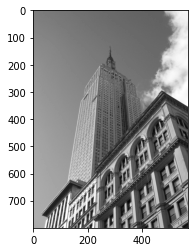

In [2]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread("empire.jpg")  
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
avg_kernel = np.ones((5,5))/25
avg_result = cv.filter2D(img_gray, -1, avg_kernel) 
plt.imshow(img_gray, "gray")

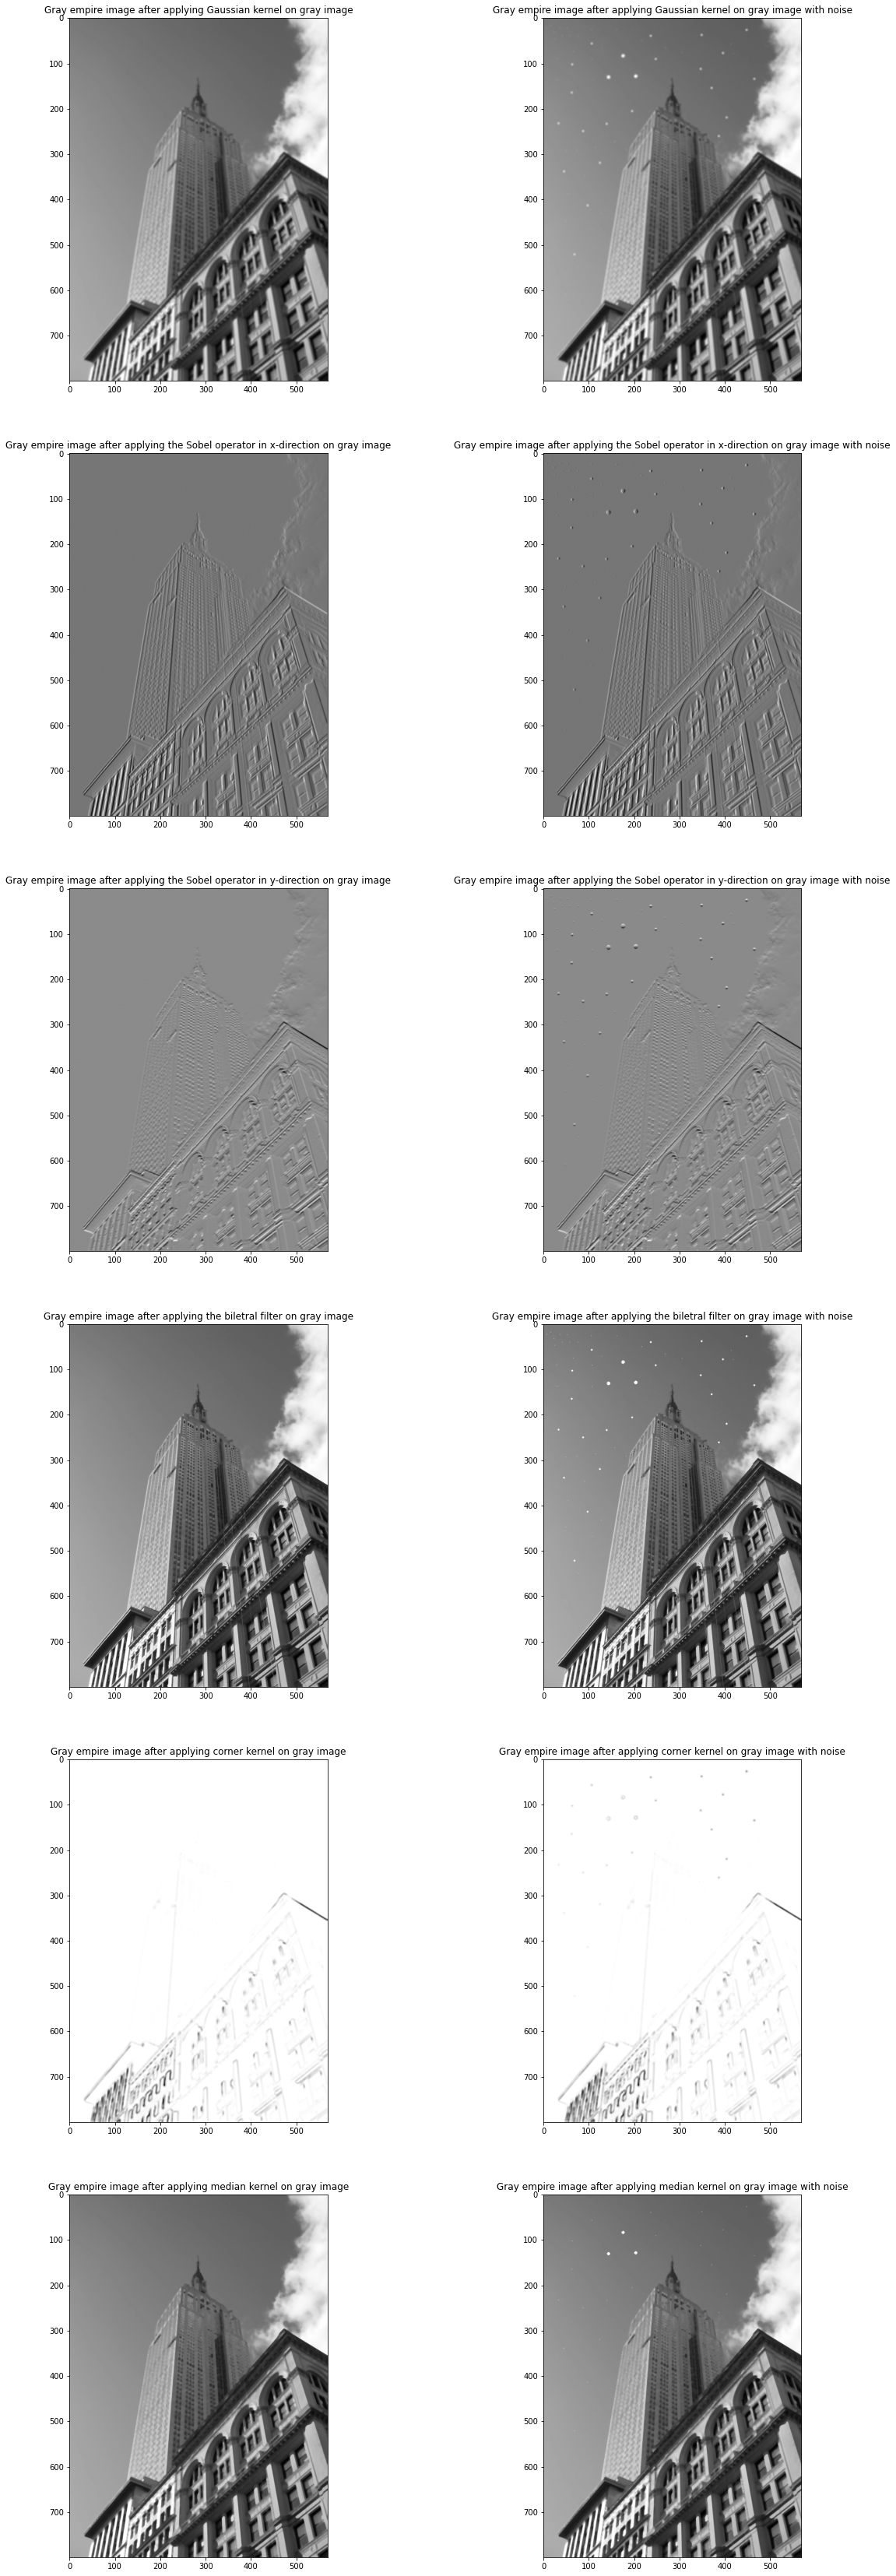

In [24]:
ksize =5
sigma_s = 10
sigma_c = 30
num_of_filters=6
images = []
titles = []

def all_filters(image_name, images, ksize, sigma_s, sigma_c):
    sub_images = []
    images.append(cv.GaussianBlur(image_name,(ksize,ksize),cv.BORDER_DEFAULT))
    images.append(cv.Sobel(image_name, cv.CV_16S, 1, 0, ksize=ksize))
    images.append(cv.Sobel(image_name, cv.CV_16S, 0, 1, ksize=ksize))
    images.append(cv.bilateralFilter(image_name, rad, sigma_c, sigma_s))
    images.append(cv.cornerHarris(image_name, 5, ksize, 3))
    images.append(cv.medianBlur(image_name, ksize))
    return images

titles_pref = [
"Gray empire image after applying Gaussian kernel", 
"Gray empire image after applying the Sobel operator in x-direction", 
"Gray empire image after applying the Sobel operator in y-direction", 
"Gray empire image after applying the biletral filter", 
"Gray empire image after applying corner kernel",
"Gray empire image after applying median kernel"
]

images+all_filters(img_gray, images, ksize, sigma_s, sigma_c)
images+all_filters(img_noise_gray, images, ksize, sigma_s, sigma_c)
for i in range(0,num_of_filters):
    titles.append(titles_pref[i]+ " on gray image")
for i in range(num_of_filters,2*num_of_filters):
    titles.append(titles_pref[i-num_of_filters]+ " on gray image with noise")

fig, axs = plt.subplots(num_of_filters,2, figsize=(20, 60))
for i in range(0,len(images)):
    axs[i%num_of_filters, int(i/num_of_filters)].imshow(images[i], "gray")    
    axs[i%num_of_filters, int(i/num_of_filters)].title.set_text(titles[i])
plt.show()


The chosen median filter supress noise more effectively than the chosen gaussian filter.
The chosen bilateral filter supresses noise as bad as the chosen gaussian filter.

# Edge detection using Sobel kernels

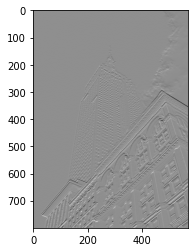

In [25]:
D_x = np.float32([[-1,0,1],[-2,0,2],[-1,0,1]])/8
der_x = cv.filter2D(img_gray, cv.CV_32F, D_x) 
plt.imshow(der_x, "gray")
D_y = np.float32([[-1,-2,-1],[0,0,0],[1,2,1]])
der_y = cv.filter2D(img_gray, cv.CV_32F, D_y)
plt.imshow(der_y, "gray")

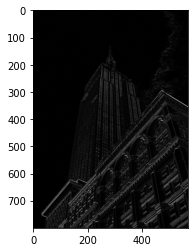

In [27]:
import math
height, width = img_gray.shape
mag_img_gray = np.zeros((height, width), np.float32)

for i in range(0, height):
    for j in range(0, width):
        square_der_x = float(der_x[i,j]) *float(der_x[i,j])
        square_der_y = float(der_y[i,j])*float(der_y[i,j])
        mag_img_gray[i,j] = int(math.sqrt(square_der_x + square_der_y))
plt.imshow(mag_img_gray, "gray")


# Edge detection with Canny edge detector

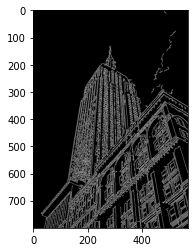

In [28]:
minVal = 100
maxVal = 200
Canny_edges = cv.Canny(img_gray, minVal, maxVal)
plt.imshow(Canny_edges, "gray")